# <span style="color:#0b486b">  FIT5215: Deep Learning (2025)</span>
***
*CE/Lecturer (Clayton):*  **Dr Trung Le** | trunglm@monash.edu <br/>
*Lecturer (Clayton):* **A/Prof Zongyuan Ge** | zongyuan.ge@monash.edu <br/>
*Lecturer (Malaysia):*  **Dr Arghya Pal** | arghya.pal@monash.edu <br/>
 <br/>
*Head Tutor 3181:*  **Ms Ruda Nie H** |  \[RudaNie.H@monash.edu \] <br/>
*Head Tutor 5215:*  **Ms Leila Mahmoodi** |  \[leila.mahmoodi@monash.edu \]

<br/> <br/>
Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">  Student Information</span>
***
Surname: **Zheng**  <br/>
Firstname: **Ziyang (Mitchell)**    <br/>
Student ID: **36054992**    <br/>
Email: **mzhe0016@student.monash.edu**    <br/>
Your tutorial time: **Wednesday 2pm**    <br/>
***

# <span style="color:#0b486b">Deep Neural Networks</span>
### Due: <span style="color:red">11:55pm Sunday, 14 September 2025</span>  (Sunday)

#### <span style="color:red">Important note:</span> This is an **individual** assignment. It contributes **20%** to your final mark. Read the assignment instructions carefully.

## <span style="color:#0b486b">What to submit</span>

This assignment is to be completed individually and submitted to Moodle unit site. **By the due date, you are required to submit one  <span style="color:red; font-weight:bold">single zip file, named xxx_assignment01_solution.zip</span> where `xxx` is your student ID, to the corresponding Assignment (Dropbox) in Moodle**. You can use Google Colab to do Assigmnent 1 but you need to save it to an `*.ipynb` file to submit to the unit Moodle.

**More importantly, if you use Google Colab to do this assignment, you need to first make a copy of this notebook on your Google drive**.

***For example, if your student ID is <span style="color:red; font-weight:bold">12356</span>, then gather all of your assignment solution to folder, create a zip file named <span style="color:red; font-weight:bold">123456_assignment01_solution.zip</span> and submit this file.***

Within this zip folder, you **must** submit the following files:
1.	**Assignment01_solution.ipynb**:  this is your Python notebook solution source file.
1.	**Assignment01_output.html**: this is the output of your Python notebook solution *exported* in html format.
1.	Any **extra files or folder** needed to complete your assignment (e.g., images used in your answers).

Since the notebook is quite big to load and work together, one recommended option is to split solution into three parts and work on them seperately. In that case, replace **Assignment01_solution.ipynb** by three notebooks: **Assignment01_Part1_solution.ipynb**, **Assignment01_Part2_solution.ipynb** and **Assignment01_Part3_solution.ipynb**

**You can run your codes on Google Colab. In this case, you have to make a copy of your Google colab notebook including the traces and progresses of model training before submitting.**



## <span style="color:#0b486b">Part 1: Theory and Knowledge Questions</span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 30 points]<span></div>

The first part of this assignment is to demonstrate your knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the lectures and tutorials from weeks 1 to 4**. Going through these materials before attempting this part is highly recommended.

####  <span style="color:red">**Question 1.1**</span> **Activation function plays an important role in modern Deep NNs. For each of the activation functions below, state its output range, find its derivative (show your steps), and plot the activation fuction and its derivative**

<span style="color:red">**(a)**</span> Exponential linear unit (ELU): $\text{ELU}(x)=\begin{cases}
0.1\left(\exp(x)-1\right) & \text{if}\,x\leq0\\
x & \text{if}\,x>0
\end{cases}$
<div style="text-align: right"><span style="color:red">[1.5 points]</span></div>

<span style="color:red">**(b)**</span> Gaussian Error Linear Unit (GELU): $\text{GELU}(x)=x\Phi(x)$ where $\Phi(x)$ is the `probability cummulative function` of the standard Gaussian distribution or $\Phi(x) = \mathbb{P}\left(X\leq x\right)$ where $X \sim N\left(0,1\right)$. In addition, the GELU activation fuction (the link for the [main paper](https://arxiv.org/pdf/1606.08415v5.pdf)) has been widely used in the state-of-the-art Vision for Transformers (e.g., here is the link for [the main ViT paper](https://arxiv.org/pdf/2010.11929v2.pdf)).
<div style="text-align: right"><span style="color:red">[1.5 points]</span></div>

**(a)**

**Output Range:**
The output range is (-0.1, +$\infty$)

**Derivative:**

- For \(x > 0\):

  $
  \frac{d}{dx} \text{ELU}(x) = \frac{d}{dx}x = 1
  $

  
- For \( x $\leq$ 0\):

  $
  \frac{d}{dx} \text{ELU}(x) = \frac{d}{dx} [0.1(\exp(x)-1)] = 0.1 \exp(x)
  $



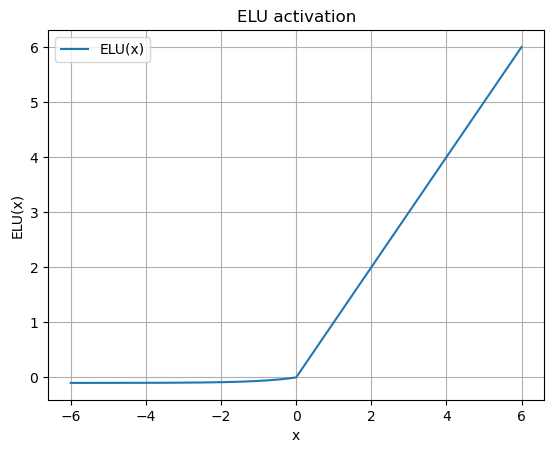

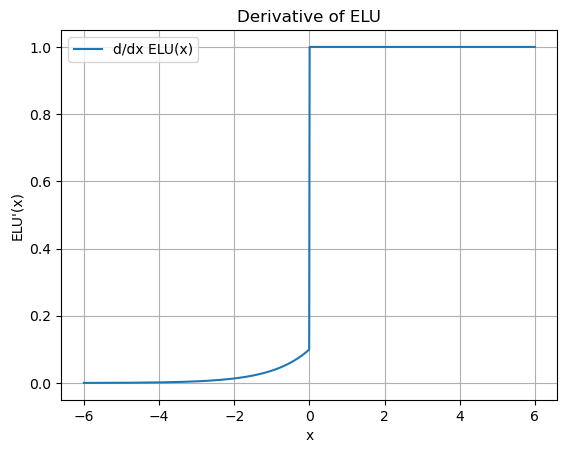

In [2]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.1  # ELU parameter

# ELU function
def elu(x, alpha=alpha):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

# Derivative of ELU
def d_elu(x, alpha=alpha):
    return np.where(x > 0, 1, alpha * np.exp(x))

# Domain
x = np.linspace(-6, 6, 1000)

# Plot ELU
plt.figure()
plt.plot(x, elu(x), label="ELU(x)")
plt.title("ELU activation")
plt.xlabel("x")
plt.ylabel("ELU(x)")
plt.legend()
plt.grid(True)

# Plot derivative
plt.figure()
plt.plot(x, d_elu(x), label="d/dx ELU(x)")
plt.title("Derivative of ELU")
plt.xlabel("x")
plt.ylabel("ELU'(x)")
plt.legend()
plt.grid(True)

plt.show()


**(b)**

**Output Range:**<br>
The output range is (-0.168, +$\infty$).<br>

**Derivative:**<br>
$
\frac{d}{dx}\text{GELU}(x) = \frac{d}{dx} [x\Phi(x)] = \Phi(x) + x\phi(x)
$



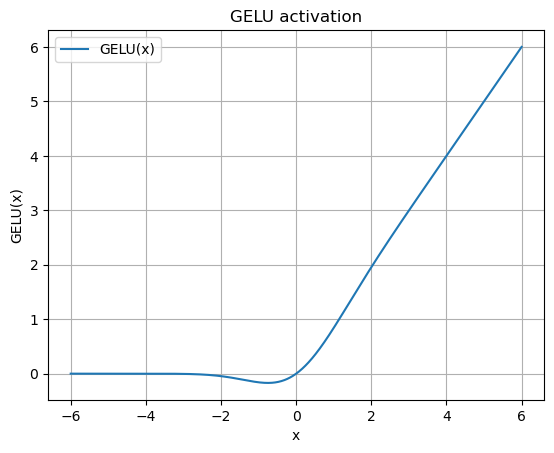

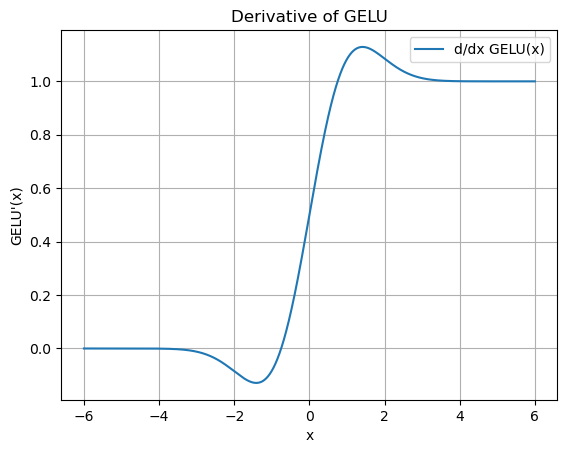

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
from math import erf as _erf

erf = np.vectorize(_erf)

def Phi(x):
    return 0.5 * (1.0 + erf(x / np.sqrt(2.0)))

def phi(x):
    return (1.0 / np.sqrt(2.0 * np.pi)) * np.exp(-0.5 * x**2)

def gelu(x):
    return x * Phi(x)

def d_gelu(x):
    return Phi(x) + x * phi(x)

x = np.linspace(-6, 6, 1000)

# Plot GELU
plt.figure()
plt.plot(x, gelu(x), label="GELU(x)")
plt.title("GELU activation")
plt.xlabel("x")
plt.ylabel("GELU(x)")
plt.legend()
plt.grid(True)

# Plot derivative
plt.figure()
plt.plot(x, d_gelu(x), label="d/dx GELU(x)")
plt.title("Derivative of GELU")
plt.xlabel("x")
plt.ylabel("GELU'(x)")
plt.legend()
plt.grid(True)

plt.show()


####  <span style="color:red">**Question 1.2:**</span> **Assume that we feed a data point $x$ with a ground-truth label $y=2$ to the feed-forward neural network with the `ReLU activation` function as shown in the following figure**


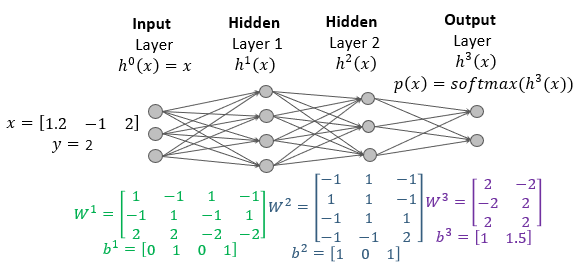

<span style="color:red">**(a)**</span>  What is the numerical value of the latent presentation $h^1(x)$?
<br>
$
z^1 = xW^1 + b^1
$

$
xW^1 
$
<br>

$= 
\left[\begin{array}{cc}
1.2 & -1 & 2
\end{array}\right]
*
\left[\begin{array}{cc}
1 & -1 & 1 & -1\\
-1 & 1 & -1 & 1\\
2 & 2 & -2 & -2
\end{array}\right]
$
<br>
$=
\left[\begin{array}{cc}
((1.2 * 1) + (-1 * -1) + (2 * 2)) & ((1.2 * -1) + (-1 * 1) + (2 * 2)) & ((1.2 * 1) + (-1 * -1) + (2 * -2)) & ((1.2 * -1) + (-1 * 1) + (2 * -2))
\end{array}\right]
$
<br>
$= \left[\begin{array}{cc}6.2 & 1.8 & 0 & -6.2\end{array}\right]
$

$
xW^1 + b^1
$
<br>
$=
\left[\begin{array}{cc}
6.2 & 1.8 & -1.8 & -6.2
\end{array}\right]
+
\left[\begin{array}{cc}
0 & 1 & 0 & 1
\end{array}\right]
$
<br>
$=\left[\begin{array}{cc}6.2 & 2.8 & -1.8 & -5.2\end{array}\right]
$

Therefore:
<br>
$
h^1(x) = ReLU(z^1) = \left[\begin{array}{cc}6.2 & 2.8 & 0 & 0\end{array}\right]
$
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

<span style="color:red">**(b)**</span>  What is the numerical value of the latent presentation $h^2(x)$?
<br>
$
z^2 = h^1(x)W^2 + b^2
$

$
h^1(x)W^2
$
<br>
$=
\left[\begin{array}{cc}
6.2 & 2.8 & 0 & 0
\end{array}\right]
*
\left[\begin{array}{cc}
-1 & 1 & -1\\
1 & 1 & -1\\
-1 & 1 & 1\\
-1 & -1 & 2
\end{array}\right]
$
<br>
$=
\left[\begin{array}{cc}
((6.2 * -1) + (2.8 * 1) + (0 * -1) + (0 * -1)) & ((6.2 * 1) + (2.8 * 1) + (0 * 1) + (0 * -1)) & ((6.2 * -1) + (2.8 * -1) + (0 * 1) + (0 * 2))
\end{array}\right]
$
<br>
$=
\left[\begin{array}{cc}
-3.4 & 9.0 & -9.0
\end{array}\right]
$

$
h^1(x)W^2 + b^2
$
<br>
$=
\left[\begin{array}{cc}
-3.4 & 9 & -9
\end{array}\right]
+
\left[\begin{array}{cc}
1 & 0 & 1
\end{array}\right]
$
<br>
$=
\left[\begin{array}{cc}
-2.4 & 9 & -8
\end{array}\right]
$

Therefore:
<br>
$
h^2(x) = ReLU(z^2) = \left[\begin{array}{cc}0 & 9 & 0\end{array}\right]
$
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

<span style="color:red">**(c)**</span>  What is the numerical value of the logit $h^3(x)$?
<br>
$
z^3 = h^2(x)W^3 + b^3
$

$
h^2(x)W^3
$
<br>
$=
\left[\begin{array}{cc}
0 & 9 & 0
\end{array}\right]
*
\left[\begin{array}{cc}
2 & -2\\
-2 & 2\\
2 & 2
\end{array}\right]
$
<br>
$=
\left[\begin{array}{cc}
((0 * 2) + (9 * -2) + (0 * 2)) & ((0 * -2) + (9 * 2) + (0 * 2))
\end{array}\right]
$
<br>
$=
\left[\begin{array}{cc}
-18 & 18
\end{array}\right]
$

$
h^2(x)W^3 + b^3
$
<br>
$=
\left[\begin{array}{cc}
-18 & 18
\end{array}\right]
+
\left[\begin{array}{cc}
1 & 1.5
\end{array}\right]
$
<br>
$=
\left[\begin{array}{cc}
-17 & 19.5
\end{array}\right]
$

Therefore:
<br>
$
h^3(x) = ReLU(z^3) = \left[\begin{array}{cc}-17 & 19.5\end{array}\right]
$
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

<span style="color:red">**(d)**</span>  What is the corresonding prediction probabilities $p(x)$?
<br>
$p(x)=softmax(h^3(x))$

$
p_{i} = \frac{e^{h^{3}}_{i}}{\sum_{j} e^{h^{3}}_{j}}
$

$=
\left[\begin{array}{cc}
\frac{e^{-17}}{e^{-17} + e^{19.5}} & \frac{e^{-19.5}}{e^{-17} + e^{19.5}}
\end{array}\right]
$

$\approx
\left[\begin{array}{cc}
1.41*10^{-16} & 0.998
\end{array}\right]
$
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

<span style="color:red">**(e)**</span>  What is the predicted label $\widehat{y}$? Is it a correct and an incorect prediction? Remind that $y=2$.
<br>
$\widehat{y}$ = 2 as it has a very high probability

Therefore it is a correct prediction
<div style="text-align: right"><span style="color:red">[1 point]</span></div>


<span style="color:red">**(f)**</span>  What is the cross-entropy loss caused by the feed-forward neural network at $(x,y)$? Remind that $y=2$.
<br>
$
CE(1_{y}, p) = -\log{p_{y}}
$
<br>
$\approx
-\log{(0.998)}
$
<br>
$
\approx{0}
$
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

<span style="color:red">**(g)**</span>  Why is the cross-entropy loss caused by the feed-forward neural network at $(x,y)$ (i.e., $\text{CE}(1_y, p(x))$) always non-negative? When does this $\text{CE}(1_y, p(x))$ loss get the value $0$? Note that you need to answer this question for a general pair $(x,y)$ and a general feed-forward neural network with, for example $M=4$ classes?
<br>
<br>
The cross-entropy loss is always non-negative because since $0 < p_{y} \leq 1$ where $\log{(p_{y})} \leq 0$. Therefore $-\log{(p_{y})} \geq 0.$ 
<div style="text-align: right"><span style="color:red">[1 point]</span></div>


*You must show both formulas and numerical results for earning full mark. Although it is optional, it is great if you show your PyTorch code for your computation.*

####  <span style="color:red">**Question 1.3:**</span>
For **Question 1.3**, you have two options:
* **(1)** *perform the forward, backward propagation, and SGD update for `one mini-batch`* (**10 points**), or
* **(2)** *manually implement a feed-forward neural network* that can work on real tabular datasets (**20 points**).

You can choose either **(1)** or **(2)** to proceed.   

### <span style="color:red">**Option 1**</span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this option: 10 points]<span></div>

**Assume that we are constructing a multilayered feed-forward neural network for a classification problem with three classes where the model parameters will be generated randomly using your student ID. The architecture of this network is $3 (Input)\rightarrow 5(ELU) \rightarrow 3(Output)$ as shown in the following figure. Note that the ELU has the same formula as the one in Q1.1.**


We feed a batch $X$ with the labels $Y$ as shown in the figure. Answer the following questions.

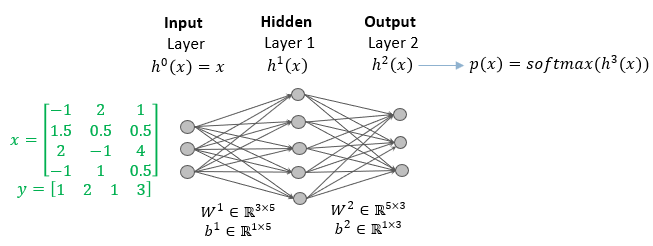

**You need to show both formulas, numerical results, and your PyTorch code for your computation for earning full marks.**

In [3]:
import torch
student_id = 36054992   #insert your student id here for example 1234
torch.manual_seed(student_id)

In [ ]:
#Code to generate random matrices and biases for W1, b1, W2, b2




**Forward propagation**

<span style="color:red">**(a)**</span>  What is the value of $\bar{h}^{1}(x)$ (the pre-activation values of $h^1$)?
<div style="text-align: right"><span style="color:red">[0.5 point]</span></div>


In [ ]:
#Show your code




<span style="color:red">**(b)**</span>  What is the value of $h^{1}(x)$?
<div style="text-align: right"><span style="color:red">[0.5 point]</span></div>

In [ ]:
#Show your code



<span style="color:red">**(c)**</span>  What is the predicted value $\widehat{y}$?
<div style="text-align: right"><span style="color:red">[0.5 point]</span></div>

In [ ]:
#Show your code



(d) Suppose that we use the cross-entropy (CE) loss. What is the value of the CE loss $l$ incurred by the mini-batch?

[0.5 point]

In [ ]:
#Show your code



**Backward propagation**

<span style="color:red">**(e)**</span> What are the derivatives $\frac{\partial l}{\partial h^{2}},\frac{\partial l}{\partial W^{2}}$, and $\frac{\partial l}{\partial b^{2}}$?
<div style="text-align: right"><span style="color:red">[3 points]</span></div>

In [ ]:
#Show your code



<span style="color:red">**(f)**</span> What are the derivatives $\frac{\partial l}{\partial h^{1}}, \frac{\partial l}{\partial \bar{h}^{1}},\frac{\partial l}{\partial W^{1}}$, and $\frac{\partial l}{\partial b^{1}}$?
<div style="text-align: right"><span style="color:red">[3 points]</span></div>

In [ ]:
#Show your code



**SGD update**

<span style="color:red">**(g)**</span> Assume that we use SGD with learning rate $\eta=0.01$ to update the model parameters. What are the values of $W^2, b^2$ and $W^1, b^1$ after updating?
<div style="text-align: right"><span style="color:red">[2 points]</span></div>

In [ ]:
#Show your code



### <span style="color:red">**Option 2**</span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this option: 20 points]<span></div>

In [11]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

**In Option 2, you need to implement a feed-forward NN manually using PyTorch and auto-differentiation of PyTorch. We then manually train the model on the MNIST dataset**.

We first download the `MNIST` dataset and preprocess it.

In [12]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert the image to a tensor with shape [C, H, W]
    transforms.Normalize((0.5,), (0.5,)),  # Normalize to [-1, 1]
    transforms.Lambda(lambda x: x.view(28*28)) # Flatten the tensor to shape [-1,HW]
])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_data, train_labels = train_dataset.data, train_dataset.targets
test_data, test_labels = test_dataset.data, test_dataset.targets
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

torch.Size([60000, 28, 28]) torch.Size([60000])
torch.Size([10000, 28, 28]) torch.Size([10000])


Each data point has dimension `[28,28]`. We need to flatten it to a vector to input to our FFN.

In [13]:
train_dataset.data = train_data.data.reshape(-1, 28*28)
test_dataset.data = test_data.data.reshape(-1, 28*28)

train_data, train_labels = train_dataset.data, train_dataset.targets
test_data, test_labels = test_dataset.data, test_dataset.targets
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

torch.Size([60000, 784]) torch.Size([60000])
torch.Size([10000, 784]) torch.Size([10000])


We split the train and test sets into many mini-batches of 64.

In [14]:
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True,
    pin_memory=True
    )
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=64,
    shuffle=False,
    pin_memory=True
    )

**Develop the feed-forward neural networks**

**(a)** You need to develop the class `MyLinear` with the following skeleton. You need to declare the weight matrix and bias of this linear layer.

<div style="text-align: right"><span style="color:red">[3 points]</span></div>

In [15]:
class MyLinear(torch.nn.Module):
  def __init__(self, input_size, output_size):
    """
    input_size: the size of the input
    output_size: the size of the output
    """
    super().__init__()
    #Your code here
    self.W = torch.nn.Parameter(torch.empty(input_size, output_size))
    self.b = torch.nn.Parameter(torch.zeros(output_size))

    torch.nn.init.kaiming_uniform_(self.W, nonlinearity='relu')

  #forward propagation
  def forward(self, x): #x is a mini-batch
    return x @ self.W + self.b

**(b)** You need to develop the class `MyFFN` with the following skeleton

<div style="text-align: right"><span style="color:red">[7 points]</span></div>

In [16]:
class MyFFN(torch.nn.Module):
  def __init__(self, input_size, num_classes, hidden_sizes, act = torch.nn.ReLU()):
    """
    input_size: the size of the input
    num_classes: the number of classes
    act is the activation function
    hidden_sizes is the list of hidden sizes
    for example input_size = 3, hidden_sizes = [5, 7], num_classes = 4, and act = torch.nn.ReLU()
    means that we are building up a FFN with the confirguration
    (3 (Input) -> 5 (ReLU) -> 7 (ReLU) -> 4 (Output))
    """
    super(MyFFN, self).__init__()
    self.input_size = input_size
    self.num_classes = num_classes
    self.act = act
    self.hidden_sizes = hidden_sizes
    self.num_layers = len(hidden_sizes) + 1
    self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  def create_FFN(self):
    """
    This function creates the feed-forward neural network
    We stack many MyLinear layers
    """
    hidden_sizes = [self.input_size] + self.hidden_sizes + [self.num_classes]
    self.layers = []
    #Your code here
    for i in range(len(hidden_sizes) - 1):
      in_f, out_f = hidden_sizes[i], hidden_sizes[i + 1]
      self.layers.append(MyLinear(in_f, out_f))

    self.layers = torch.nn.ModuleList(self.layers)


  def forward(self,x):
    """
    This implements the forward propagation of the batch x
    This needs to return the logits of x
    """
    # flatten if inputs are images [B,C,H,W]
    if x.dim() > 2:
      x = x.view(x.size(0), -1)

    # allow passing act as class or instance
    def apply_act(t):
      if isinstance(self.act, type):
        return self.act()(t)
      else:
        return self.act(t)

    for i, layer in enumerate(self.layers):
      x = layer(x)
      if i < len(self.layers) - 1:
        x = apply_act(x)
    return x

  def compute_loss(self, x, y):
    """
    This function computes the cross-entropy loss
    You can use the built-in CE loss of PyTorch
    """
    logits = self.forward(x)
    return torch.nn.functional.cross_entropy(logits, y)
  
  def _zero_grads(self):
    for p in self.parameters():
      if p.grad is not None:
        p.grad.zero_()

  def update_SGD(self, x, y, learning_rate = 0.01):
    """
    This function updates the model parameters using SGD using the batch (x,y)
    You need to implement the update rule manually and cannot rely on the built-in optimizer
    """
    x, y = x.to(self.device), y.to(self.device)
    if x.dim() > 2: x = x.view(x.size(0), -1)

    loss = self.compute_loss(x, y)
    self._zero_grads()
    loss.backward()
    with torch.no_grad():
      for p in self.parameters():
        if p.grad is not None:
          p.add_(-learning_rate * p.grad)
    return float(loss.item())

  def update_SGDwithMomentum(self, x, y, learning_rate = 0.01, momentum = 0.9):
    """
    This function updates the model parameters using SGD with momentum using the batch (x,y)
    You need to implement the update rule manually and cannot rely on the built-in optimizer
    """
    x, y = x.to(self.device), y.to(self.device)
    if x.dim() > 2: x = x.view(x.size(0), -1)

    params = [p for p in self.parameters() if p.requires_grad]
    if not hasattr(self, "_mom_params"):
      self._mom_params = params
      self._vel = [torch.zeros_like(p) for p in self._mom_params]

    loss = self.compute_loss(x, y)
    self._zero_grads()
    loss.backward()

    with torch.no_grad():
      for p, v in zip(self._mom_params, self._vel):
        v.mul_(momentum).add_(p.grad)   # v = m*v + grad
        p.add_(-learning_rate * v)      # p = p - lr * v
    return float(loss.item())

  def update_AdaGrad(self, x, y, learning_rate = 0.01):
    """
    This function updates the model parameters using AdaGrad using the batch (x,y)
    You need to implement the update rule manually and cannot rely on the built-in optimizer
    """
    x, y = x.to(self.device), y.to(self.device)
    if x.dim() > 2: x = x.view(x.size(0), -1)
    
    params = [p for p in self.parameters() if p.requires_grad]
    if not hasattr(self, "_ag_params"):
      self._ag_params = params
      self._g2 = [torch.zeros_like(p) for p in self._ag_params]

    loss = self.compute_loss(x, y)
    self._zero_grads()
    loss.backward()
    eps = np.finfo(float).eps
    
    with torch.no_grad():
      for p, g2 in zip(self._ag_params, self._g2):
        g2.add_(p.grad * p.grad)                               # accumulate squared grads
        step = (learning_rate / (torch.sqrt(g2) + eps)) * p.grad
        p.add_(-step)
    return float(loss.item())


In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

myFFN = MyFFN(input_size = 28*28, num_classes = 10, hidden_sizes = [100, 100], act = torch.nn.ReLU)
myFFN.create_FFN()
myFFN.to(device)

print(myFFN)
print("model device:", next(myFFN.parameters()).device)

MyFFN(
  (layers): ModuleList(
    (0-2): 3 x MyLinear()
  )
)
model device: cuda:0


**(c)** Write the code to evaluate the accuracy of the current `myFFN` model on a data loader (e.g., train_loader or test_loader).

<div style="text-align: right"><span style="color:red">[2.5 points]</span></div>

In [18]:
def compute_acc(model, data_loader, device):
  """
  This function computes the accuracy of the model on a data loader
  """
  model.eval()

  correct, total = 0, 0
  with torch.no_grad():
    for xb, yb in data_loader:
      xb = xb.to(device)
      yb = yb.to(device)
      # flatten if images came in as [B, C, H, W]
      if xb.dim() > 2:
        xb = xb.view(xb.size(0), -1)
      logits = model(xb)
      preds = logits.argmax(dim=1)
      correct += (preds == yb).sum().item()
      total += yb.size(0)
  return correct / max(1, total)



**(d)** Write the code to evaluate the loss of the current `myFFN` model on a data loader (e.g., train_loader or test_loader).

<div style="text-align: right"><span style="color:red">[2.5 points]</span></div>

In [19]:
def compute_loss(model, data_loader, device):
  """
  This function computes the loss of the model on a data loader
  """
  model.eval()

  total_loss, total = 0.0, 0
  with torch.no_grad():
    for xb, yb in data_loader:
      xb, yb = xb.to(device), yb.to(device)
      # Flatten images if they come as [B, C, H, W]
      if xb.dim() > 2:
        xb = xb.view(xb.size(0), -1)

      loss = model.compute_loss(xb, yb)  # should return mean loss for the batch
      bs = yb.size(0)
      total_loss += loss.item() * bs
      total += bs

  return total_loss / max(total, 1)


Train on the `MNIST` data with 50 epochs using `updateSGD`.

In [11]:
import torch, sys, platform
print("is_available:", torch.cuda.is_available())
print("torch version:", torch.__version__)
print("built against CUDA:", torch.version.cuda)
print("cudnn available:", torch.backends.cudnn.is_available())
print("python:", sys.executable)
print("torch file:", torch.__file__)

is_available: True
torch version: 2.5.1
built against CUDA: 12.4
cudnn available: True
python: c:\Users\errty\anaconda3\python.exe
torch file: c:\Users\errty\anaconda3\Lib\site-packages\torch\__init__.py


In [46]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using Device: {device}")
num_epochs = 50
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):
      myFFN.update_SGD(x, y, learning_rate = 0.01)
    train_acc = compute_acc(myFFN, train_loader, device)
    train_loss = compute_loss(myFFN, train_loader, device)
    test_acc = compute_acc(myFFN, test_loader, device)
    test_loss = compute_loss(myFFN, test_loader, device)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc*100:.2f}%")

Using Device: cuda:0
Epoch 1/50, Train Loss: 0.8506, Train Acc: 75.24%, Test Loss: 0.8118, Test Acc: 76.65%
Epoch 2/50, Train Loss: 0.6432, Train Acc: 81.12%, Test Loss: 0.6218, Test Acc: 82.39%
Epoch 3/50, Train Loss: 0.5204, Train Acc: 84.72%, Test Loss: 0.5025, Test Acc: 85.59%
Epoch 4/50, Train Loss: 0.4691, Train Acc: 85.94%, Test Loss: 0.4579, Test Acc: 86.43%
Epoch 5/50, Train Loss: 0.4767, Train Acc: 85.82%, Test Loss: 0.4700, Test Acc: 86.01%
Epoch 6/50, Train Loss: 0.4214, Train Acc: 87.15%, Test Loss: 0.4180, Test Acc: 87.44%
Epoch 7/50, Train Loss: 0.3917, Train Acc: 88.28%, Test Loss: 0.3899, Test Acc: 88.75%
Epoch 8/50, Train Loss: 0.3587, Train Acc: 89.31%, Test Loss: 0.3598, Test Acc: 89.35%
Epoch 9/50, Train Loss: 0.3410, Train Acc: 89.75%, Test Loss: 0.3439, Test Acc: 89.95%
Epoch 10/50, Train Loss: 0.3334, Train Acc: 90.11%, Test Loss: 0.3353, Test Acc: 90.27%
Epoch 11/50, Train Loss: 0.3653, Train Acc: 88.88%, Test Loss: 0.3711, Test Acc: 88.80%
Epoch 12/50, Train L

**(e)** Implement the function `updateSGDMomentum` in the class and train the model with this optimizer in `50` epochs. You can update the corresponding function in the `MyFNN` class.

<div style="text-align: right"><span style="color:red">[2.5 points]</span></div>

In [47]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using Device: {device}")

myFFN = MyFFN(input_size=28*28, num_classes=10, hidden_sizes=[100, 100], act=torch.nn.ReLU())
myFFN.create_FFN()
myFFN.to(device)

num_epochs = 50
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):
      myFFN.update_SGDwithMomentum(x, y, learning_rate = 0.01)
    train_acc = compute_acc(myFFN, train_loader, device)
    train_loss = compute_loss(myFFN, train_loader, device)
    test_acc = compute_acc(myFFN, test_loader, device)
    test_loss = compute_loss(myFFN, test_loader, device)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc*100:.2f}%")

Using Device: cuda:0
Epoch 1/50, Train Loss: 0.4166, Train Acc: 87.37%, Test Loss: 0.3964, Test Acc: 88.46%
Epoch 2/50, Train Loss: 0.3045, Train Acc: 90.90%, Test Loss: 0.2926, Test Acc: 91.09%
Epoch 3/50, Train Loss: 0.2552, Train Acc: 92.18%, Test Loss: 0.2488, Test Acc: 92.28%
Epoch 4/50, Train Loss: 0.2289, Train Acc: 93.08%, Test Loss: 0.2296, Test Acc: 92.97%
Epoch 5/50, Train Loss: 0.2073, Train Acc: 93.83%, Test Loss: 0.2114, Test Acc: 93.50%
Epoch 6/50, Train Loss: 0.1872, Train Acc: 94.27%, Test Loss: 0.1917, Test Acc: 94.03%
Epoch 7/50, Train Loss: 0.1736, Train Acc: 94.81%, Test Loss: 0.1829, Test Acc: 94.51%
Epoch 8/50, Train Loss: 0.1703, Train Acc: 94.88%, Test Loss: 0.1851, Test Acc: 94.54%
Epoch 9/50, Train Loss: 0.1523, Train Acc: 95.35%, Test Loss: 0.1643, Test Acc: 94.88%
Epoch 10/50, Train Loss: 0.1568, Train Acc: 95.08%, Test Loss: 0.1746, Test Acc: 94.55%
Epoch 11/50, Train Loss: 0.1409, Train Acc: 95.75%, Test Loss: 0.1591, Test Acc: 95.07%
Epoch 12/50, Train L

**(f)** Implement the function `updateAdagrad` in the class and train the model with this optimizer in `50` epochs. You can update the corresponding function in the `MyFNN` class.

<div style="text-align: right"><span style="color:red">[2.5 points]</span></div>

In [48]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using Device: {device}")

myFFN = MyFFN(input_size=28*28, num_classes=10, hidden_sizes=[100, 100], act=torch.nn.ReLU())
myFFN.create_FFN()
myFFN.to(device)

num_epochs = 50
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):
      myFFN.update_AdaGrad(x, y, learning_rate = 0.01)
    train_acc = compute_acc(myFFN, train_loader, device)
    train_loss = compute_loss(myFFN, train_loader, device)
    test_acc = compute_acc(myFFN, test_loader, device)
    test_loss = compute_loss(myFFN, test_loader, device)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc*100:.2f}%")

Using Device: cuda:0
Epoch 1/50, Train Loss: 0.5591, Train Acc: 83.39%, Test Loss: 0.5448, Test Acc: 83.91%
Epoch 2/50, Train Loss: 0.3602, Train Acc: 89.50%, Test Loss: 0.3457, Test Acc: 89.80%
Epoch 3/50, Train Loss: 0.3169, Train Acc: 90.75%, Test Loss: 0.3134, Test Acc: 90.67%
Epoch 4/50, Train Loss: 0.2733, Train Acc: 91.96%, Test Loss: 0.2746, Test Acc: 91.79%
Epoch 5/50, Train Loss: 0.2517, Train Acc: 92.34%, Test Loss: 0.2589, Test Acc: 92.48%
Epoch 6/50, Train Loss: 0.2280, Train Acc: 93.18%, Test Loss: 0.2362, Test Acc: 93.07%
Epoch 7/50, Train Loss: 0.2216, Train Acc: 93.48%, Test Loss: 0.2340, Test Acc: 93.01%
Epoch 8/50, Train Loss: 0.1966, Train Acc: 94.16%, Test Loss: 0.2085, Test Acc: 93.93%
Epoch 9/50, Train Loss: 0.1990, Train Acc: 93.99%, Test Loss: 0.2165, Test Acc: 93.35%
Epoch 10/50, Train Loss: 0.1952, Train Acc: 94.08%, Test Loss: 0.2111, Test Acc: 93.63%
Epoch 11/50, Train Loss: 0.1665, Train Acc: 95.06%, Test Loss: 0.1877, Test Acc: 94.45%
Epoch 12/50, Train L

## <span style="color:#0b486b">Part 2: Deep Neural Networks (DNN) </span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 25 points]<span></div>

The second part of this assignment is to demonstrate your basis knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the tutorials covered from weeks 1 to 2**. Going through these materials before attempting this assignment is highly recommended.

In the second part of this assignment, you are going to work with the FashionMNIST dataset for the image recognition task. It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem is significantly more challenging than MNIST.

In [20]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

torch.manual_seed(1234)

**Load the Fashion MNIST using `torchvision`**

In [21]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset_orgin = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

print(train_dataset_orgin.data.shape, train_dataset_orgin.targets.shape)
print(test_dataset.data.shape, test_dataset.targets.shape)

# Flatten the data
train_dataset_orgin.data = train_dataset_orgin.data.reshape(-1, 28*28)
test_dataset.data = test_dataset.data.reshape(-1, 28*28)

print(train_dataset_orgin.data.shape, train_dataset_orgin.targets.shape)
print(test_dataset.data.shape, test_dataset.targets.shape)

N = len(train_dataset_orgin)
print(f"Number of training samples: {N}")
N_train = int(0.9*N)
N_val = N - N_train
print(f"Number of training samples: {N_train}")
print(f"Number of validation samples: {N_val}")

train_dataset, val_dataset = torch.utils.data.random_split(train_dataset_orgin, [N_train, N_val])


print(len(train_dataset))
print(len(val_dataset))


train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

torch.Size([60000, 28, 28]) torch.Size([60000])
torch.Size([10000, 28, 28]) torch.Size([10000])
torch.Size([60000, 784]) torch.Size([60000])
torch.Size([10000, 784]) torch.Size([10000])
Number of training samples: 60000
Number of training samples: 54000
Number of validation samples: 6000
54000
6000


####  <span style="color:red">**Question 2.1:**</span> Write the code to visualize a mini-batch in `train_loader` including its images and labels.

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

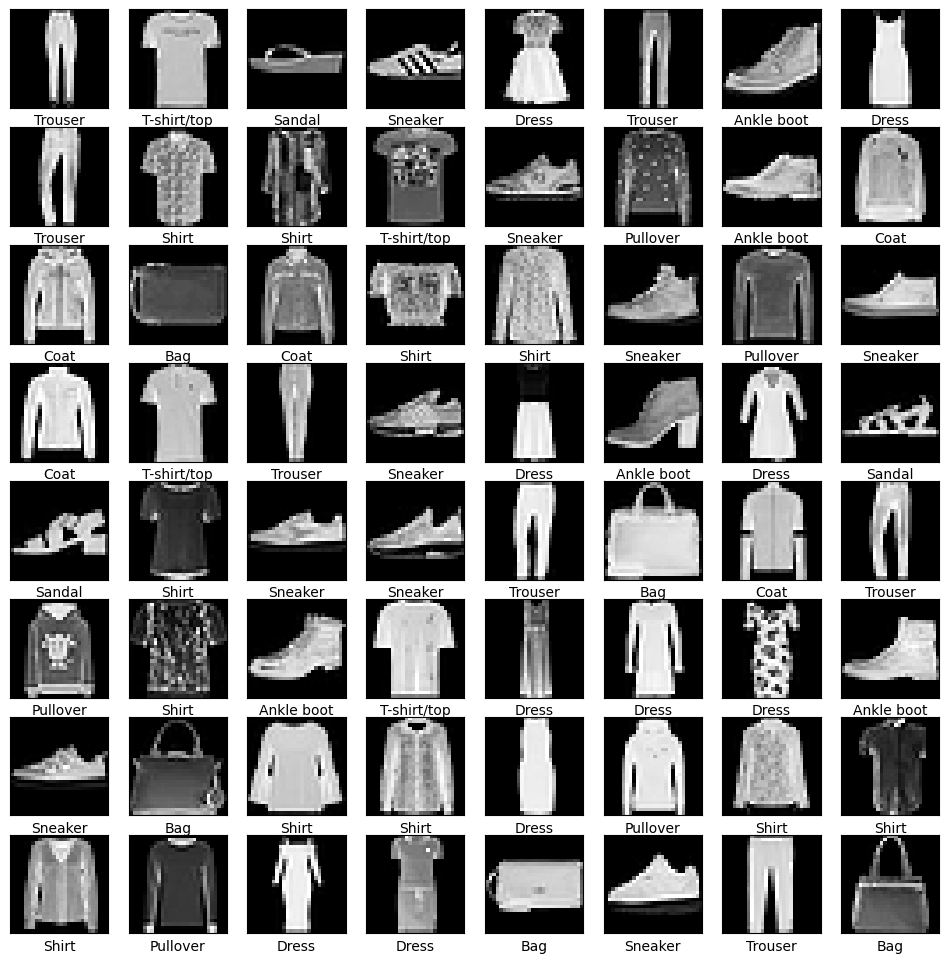

In [35]:
import math
import matplotlib.pyplot as plt

def visualize_data(images, categories, class_names, images_per_row = 8):
    n_images = len(images)
    n_rows = math.ceil(float(n_images)/images_per_row)
    fig = plt.figure(figsize=(1.5*images_per_row, 1.5*n_rows))
    fig.patch.set_facecolor('white')
    for i in range(n_images):
        plt.subplot(n_rows, images_per_row, i+1)
        plt.xticks([])
        plt.yticks([])
        img = images[i].view(28, 28)
        plt.imshow(img, cmap="gray")
        class_index = categories[i]
        plt.xlabel(class_names[class_index])
    plt.show()

# get a mini-batch
images, labels = next(iter(train_loader))

# class names
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

visualize_data(images, labels, class_names, images_per_row=8)

####<span style="color:red">**Question 2.2:**</span> Write the code for the feed-forward neural net using PyTorch

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We now develop a feed-forward neural network with the architecture $784 \rightarrow 40(ReLU) \rightarrow 30(ReLU) \rightarrow 10(softmax)$. You can choose your own way to implement your network and an optimizer of interest. You should train model in $50$ epochs and evaluate the trained model on the test set.

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Define the feed-forward neural net
class FeedForwardNN(nn.Module):
    def __init__(self):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 40)   # input → hidden1
        self.fc2 = nn.Linear(40, 30)      # hidden1 → hidden2
        self.fc3 = nn.Linear(30, 10)      # hidden2 → output
        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        x = x.view(x.size(0), -1)        # flatten (batch, 784)
        x = F.relu(self.fc1(x))          # ReLU activation
        x = F.relu(self.fc2(x))          # ReLU activation
        x = self.fc3(x)                  # logits
        return x
    
    def compute_loss(self, xb, yb):
        logits = self.forward(xb)
        return self.criterion(logits, yb)

# Instantiate model
model = FeedForwardNN()
print(model)


FeedForwardNN(
  (fc1): Linear(in_features=784, out_features=40, bias=True)
  (fc2): Linear(in_features=40, out_features=30, bias=True)
  (fc3): Linear(in_features=30, out_features=10, bias=True)
  (criterion): CrossEntropyLoss()
)


In [32]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FeedForwardNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        loss = model.compute_loss(xb, yb)
        loss.backward()
        optimizer.step()
    
    # Evaluate after each epoch
    train_loss = compute_loss(model, train_loader, device)
    train_acc = compute_acc(model, train_loader, device)
    test_loss = compute_loss(model, test_loader, device)
    test_acc = compute_acc(model, test_loader, device)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}% "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc*100:.2f}%")

Epoch [1/50] Train Loss: 0.4396, Train Acc: 84.23% Test Loss: 0.4799, Test Acc: 82.81%
Epoch [2/50] Train Loss: 0.4001, Train Acc: 85.29% Test Loss: 0.4464, Test Acc: 84.02%
Epoch [3/50] Train Loss: 0.3548, Train Acc: 86.98% Test Loss: 0.4105, Test Acc: 85.43%
Epoch [4/50] Train Loss: 0.3247, Train Acc: 88.13% Test Loss: 0.3872, Test Acc: 85.96%
Epoch [5/50] Train Loss: 0.3141, Train Acc: 88.46% Test Loss: 0.3859, Test Acc: 85.85%
Epoch [6/50] Train Loss: 0.3023, Train Acc: 88.72% Test Loss: 0.3776, Test Acc: 86.25%
Epoch [7/50] Train Loss: 0.2978, Train Acc: 89.09% Test Loss: 0.3756, Test Acc: 86.48%
Epoch [8/50] Train Loss: 0.2906, Train Acc: 89.49% Test Loss: 0.3761, Test Acc: 86.58%
Epoch [9/50] Train Loss: 0.2827, Train Acc: 89.58% Test Loss: 0.3726, Test Acc: 86.66%
Epoch [10/50] Train Loss: 0.2717, Train Acc: 89.93% Test Loss: 0.3717, Test Acc: 87.06%
Epoch [11/50] Train Loss: 0.2594, Train Acc: 90.50% Test Loss: 0.3654, Test Acc: 87.00%
Epoch [12/50] Train Loss: 0.2597, Train A

In [34]:
final_test_acc = compute_acc(model, test_loader, device) * 100
print(f"\n✅ Final Test Accuracy after {num_epochs} epochs: {final_test_acc:.2f}%")


✅ Final Test Accuracy after 50 epochs: 87.25%


####  <span style="color:red">**Question 2.3:**</span> Tuning hyper-parameters with grid search
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>


Assume that you need to tune the number of neurons on the first and second hidden layers $n_1 \in \{20, 40\}$, $n_2 \in \{20, 40\}$  and the used activation function  $act \in \{sigmoid, tanh, relu\}$. The network has the architecture pattern $784 \rightarrow n_1 (act) \rightarrow n_2(act) \rightarrow 10(softmax)$ where $n_1, n_2$, and $act$ are in their grides. Write the code to tune the hyper-parameters $n_1, n_2$, and $act$. Note that you can freely choose the optimizer and learning rate of interest for this task.

In [35]:
class FlexibleNN(nn.Module):
    def __init__(self, n1, n2, activation):
        super(FlexibleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, n1)
        self.fc2 = nn.Linear(n1, n2)
        self.fc3 = nn.Linear(n2, 10)
        
        if activation == "sigmoid":
            self.act = torch.sigmoid
        elif activation == "tanh":
            self.act = torch.tanh
        elif activation == "relu":
            self.act = F.relu
        else:
            raise ValueError("Unsupported activation")

        self.loss_fn = nn.CrossEntropyLoss()

    def forward(self, x):
        x = x.view(x.size(0), -1)   # flatten
        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        return self.fc3(x)          # logits

    def compute_loss(self, xb, yb):
        logits = self.forward(xb)
        return self.loss_fn(logits, yb)


In [36]:
n1_values = [20, 40]
n2_values = [20, 40]
activations = ["sigmoid", "tanh", "relu"]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

results = []

for n1 in n1_values:
    for n2 in n2_values:
        for act in activations:
            print(f"\nTraining model with n1={n1}, n2={n2}, act={act}")

            model = FlexibleNN(n1, n2, act).to(device)
            optimizer = optim.Adam(model.parameters(), lr=0.001)

            num_epochs = 10
            for epoch in range(num_epochs):
                model.train()
                for xb, yb in train_loader:
                    xb, yb = xb.to(device), yb.to(device)
                    optimizer.zero_grad()
                    loss = model.compute_loss(xb, yb)
                    loss.backward()
                    optimizer.step()

            train_acc = compute_acc(model, train_loader, device)
            test_acc = compute_acc(model, test_loader, device)

            print(f"--> Train Acc: {train_acc*100:.2f}%, Test Acc: {test_acc*100:.2f}%")

            results.append({
                "n1": n1,
                "n2": n2,
                "activation": act,
                "train_acc": train_acc,
                "test_acc": test_acc
            })



🔎 Training model with n1=20, n2=20, act=sigmoid
--> Train Acc: 87.58%, Test Acc: 85.00%

🔎 Training model with n1=20, n2=20, act=tanh
--> Train Acc: 88.04%, Test Acc: 85.21%

🔎 Training model with n1=20, n2=20, act=relu
--> Train Acc: 87.99%, Test Acc: 85.63%

🔎 Training model with n1=20, n2=40, act=sigmoid
--> Train Acc: 87.67%, Test Acc: 85.32%

🔎 Training model with n1=20, n2=40, act=tanh
--> Train Acc: 88.58%, Test Acc: 85.41%

🔎 Training model with n1=20, n2=40, act=relu
--> Train Acc: 89.02%, Test Acc: 86.66%

🔎 Training model with n1=40, n2=20, act=sigmoid
--> Train Acc: 88.98%, Test Acc: 86.17%

🔎 Training model with n1=40, n2=20, act=tanh
--> Train Acc: 89.69%, Test Acc: 86.41%

🔎 Training model with n1=40, n2=20, act=relu
--> Train Acc: 90.05%, Test Acc: 87.08%

🔎 Training model with n1=40, n2=40, act=sigmoid
--> Train Acc: 89.35%, Test Acc: 86.29%

🔎 Training model with n1=40, n2=40, act=tanh
--> Train Acc: 90.41%, Test Acc: 86.74%

🔎 Training model with n1=40, n2=40, act=r

In [38]:
print("\nGrid Search Results:")
for r in results:
    print(f"n1={r['n1']}, n2={r['n2']}, act={r['activation']}, "
          f"Train Acc={r['train_acc']*100:.2f}%, Test Acc={r['test_acc']*100:.2f}%")


Grid Search Results:
n1=20, n2=20, act=sigmoid, Train Acc=87.58%, Test Acc=85.00%
n1=20, n2=20, act=tanh, Train Acc=88.04%, Test Acc=85.21%
n1=20, n2=20, act=relu, Train Acc=87.99%, Test Acc=85.63%
n1=20, n2=40, act=sigmoid, Train Acc=87.67%, Test Acc=85.32%
n1=20, n2=40, act=tanh, Train Acc=88.58%, Test Acc=85.41%
n1=20, n2=40, act=relu, Train Acc=89.02%, Test Acc=86.66%
n1=40, n2=20, act=sigmoid, Train Acc=88.98%, Test Acc=86.17%
n1=40, n2=20, act=tanh, Train Acc=89.69%, Test Acc=86.41%
n1=40, n2=20, act=relu, Train Acc=90.05%, Test Acc=87.08%
n1=40, n2=40, act=sigmoid, Train Acc=89.35%, Test Acc=86.29%
n1=40, n2=40, act=tanh, Train Acc=90.41%, Test Acc=86.74%
n1=40, n2=40, act=relu, Train Acc=90.60%, Test Acc=87.40%


####  <span style="color:red">**Question 2.4:**</span> Implement the loss with the form: $loss(p,y)=CE(1_{y},p)+\lambda H(p)$ where $H(p)=-\sum_{i=1}^{M}p_{i}\log p_{i}$ is the entropy of $p$, $p$ is the prediction probabilities of a data point $x$ with the ground-truth label $y$, $1_y$ is an one-hot label, and $\lambda >0$ is a trade-off parameter. Set $\lambda = 0.1$ to train a model.

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>


In [39]:
class CustomLoss(nn.Module):
    def __init__(self, lam=0.1):
        super(CustomLoss, self).__init__()
        self.lam = lam
        self.ce = nn.CrossEntropyLoss()

    def forward(self, logits, targets):
        ce_loss = self.ce(logits, targets)
        p = F.softmax(logits, dim=1)
        entropy = -(p * torch.log(p + 1e-9)).sum(dim=1).mean()

        return ce_loss + self.lam * entropy

In [40]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FeedForwardNN().to(device)
criterion = CustomLoss(lam=0.1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()

    # Evaluate at the end of each epoch
    train_loss = compute_loss(model, train_loader, device)
    train_acc = compute_acc(model, train_loader, device)
    test_loss = compute_loss(model, test_loader, device)
    test_acc = compute_acc(model, test_loader, device)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}% "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc*100:.2f}%")

Epoch [1/50] Train Loss: 0.4227, Train Acc: 84.98% Test Loss: 0.4659, Test Acc: 83.02%
Epoch [2/50] Train Loss: 0.3778, Train Acc: 86.37% Test Loss: 0.4283, Test Acc: 84.87%
Epoch [3/50] Train Loss: 0.3562, Train Acc: 87.13% Test Loss: 0.4131, Test Acc: 85.75%
Epoch [4/50] Train Loss: 0.3415, Train Acc: 87.44% Test Loss: 0.4015, Test Acc: 85.55%
Epoch [5/50] Train Loss: 0.3183, Train Acc: 88.44% Test Loss: 0.3905, Test Acc: 86.09%
Epoch [6/50] Train Loss: 0.3141, Train Acc: 88.49% Test Loss: 0.3938, Test Acc: 86.07%
Epoch [7/50] Train Loss: 0.3017, Train Acc: 88.90% Test Loss: 0.3864, Test Acc: 86.49%
Epoch [8/50] Train Loss: 0.2989, Train Acc: 88.74% Test Loss: 0.3893, Test Acc: 85.82%
Epoch [9/50] Train Loss: 0.2988, Train Acc: 89.08% Test Loss: 0.3944, Test Acc: 85.88%
Epoch [10/50] Train Loss: 0.2764, Train Acc: 89.83% Test Loss: 0.3767, Test Acc: 86.65%
Epoch [11/50] Train Loss: 0.2962, Train Acc: 89.07% Test Loss: 0.4071, Test Acc: 85.77%
Epoch [12/50] Train Loss: 0.2817, Train A

####  <span style="color:red">**Question 2.5:**</span> Experimenting with **sharpness-aware minimization** technique
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Sharpness-aware minimization (SAM) (i.e., [link for main paper](https://openreview.net/pdf?id=6Tm1mposlrM) from Google Deepmind) is a simple yet but efficient technique to improve the generalization ability of deep learning models on unseen data examples. In your research or your work, you might potentially use this idea. Your task is to read the paper and implement *Sharpness-aware minimization (SAM)*. Finally, you need to apply SAM to the best architecture found in **Question 2.3**.   

In [41]:
best_model = FlexibleNN(40, 40, "relu").to(device)
base_optimizer = torch.optim.SGD(best_model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
rho = 0.05

def grad_norm(model):
    """Compute L2 norm of all gradients."""
    norms = []
    for p in model.parameters():
        if p.grad is not None:
            norms.append(p.grad.norm(p=2))
    return torch.norm(torch.stack(norms), p=2) if norms else torch.tensor(0.0, device=device)

In [42]:
num_epochs = 50
for epoch in range(num_epochs):
    best_model.train()
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)

        base_optimizer.zero_grad()
        loss = best_model.compute_loss(xb, yb)
        loss.backward()

        norm = grad_norm(best_model)
        scale = rho / (norm + 1e-12)
        e_ws = []
        with torch.no_grad():
            for p in best_model.parameters():
                if p.grad is None:
                    e_ws.append(None)
                    continue
                e = p.grad * scale
                p.add_(e)       # perturb weights
                e_ws.append(e)

        base_optimizer.zero_grad()
        loss_pert = best_model.compute_loss(xb, yb)
        loss_pert.backward()

        with torch.no_grad():
            for p, e in zip(best_model.parameters(), e_ws):
                if e is not None:
                    p.sub_(e)   # restore original weights
        base_optimizer.step()

    tr_loss = compute_loss(best_model, train_loader, device)
    tr_acc  = compute_acc(best_model, train_loader, device)
    te_loss = compute_loss(best_model, test_loader, device)
    te_acc  = compute_acc(best_model, test_loader, device)

    print(f"Epoch {epoch+1}/{num_epochs} "
          f"| Train Loss: {tr_loss:.4f} Acc: {tr_acc*100:.2f}% "
          f"| Test Loss: {te_loss:.4f} Acc: {te_acc*100:.2f}%")


Epoch 1/50 | Train Loss: 0.4575 Acc: 82.94% | Test Loss: 0.4896 Acc: 81.97%
Epoch 2/50 | Train Loss: 0.3974 Acc: 85.75% | Test Loss: 0.4362 Acc: 84.49%
Epoch 3/50 | Train Loss: 0.3779 Acc: 86.23% | Test Loss: 0.4264 Acc: 84.25%
Epoch 4/50 | Train Loss: 0.3507 Acc: 87.18% | Test Loss: 0.4021 Acc: 85.14%
Epoch 5/50 | Train Loss: 0.3419 Acc: 87.62% | Test Loss: 0.3982 Acc: 85.68%
Epoch 6/50 | Train Loss: 0.3261 Acc: 88.18% | Test Loss: 0.3814 Acc: 86.23%
Epoch 7/50 | Train Loss: 0.3166 Acc: 88.28% | Test Loss: 0.3749 Acc: 86.21%
Epoch 8/50 | Train Loss: 0.3028 Acc: 88.98% | Test Loss: 0.3682 Acc: 86.50%
Epoch 9/50 | Train Loss: 0.3037 Acc: 88.91% | Test Loss: 0.3687 Acc: 86.70%
Epoch 10/50 | Train Loss: 0.2951 Acc: 89.32% | Test Loss: 0.3606 Acc: 86.93%
Epoch 11/50 | Train Loss: 0.2927 Acc: 89.15% | Test Loss: 0.3657 Acc: 86.66%
Epoch 12/50 | Train Loss: 0.2817 Acc: 89.89% | Test Loss: 0.3546 Acc: 87.19%
Epoch 13/50 | Train Loss: 0.2890 Acc: 89.29% | Test Loss: 0.3616 Acc: 86.33%
Epoch 14

## <span style="color:#0b486b">Part 3: Convolutional Neural Networks and Image Classification</span>

**<div style="text-align: right"><span style="color:red">[Total marks for this part: 45 points]</span></div>**

The third part of this assignment is to demonstrate your basis knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the tutorials covered from weeks 3 to 6**. Going through these materials before attempting this assignment is highly recommended.

**The dataset used for this part is a specific dataset for this unit consisting of approximately $10,000$ images of $20$ classes of Animals, each of which has approximately 500 images. You can download the dataset at [download here](https://drive.google.com/file/d/1aEkxNWaD02Z8ZNvZzeMefUoY97C-3wTG/view?usp=drive_link) if you want to do your assignment on your machine.**


In [20]:
import os
import requests
import tarfile
import time
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import torchvision.models as models
import torch.nn as nn
import torch
import PIL.Image
import pathlib
from torchsummary import summary
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(1234)

CUDA is available!  Training on GPU ...


Download the dataset to the folder of this Google Colab.

In [44]:
!gdown --fuzzy https://drive.google.com/file/d/10Y65ykpja1t6UWt3imPPbZkqhe0kOPL9/view?usp=sharing # new url v1
#!gdown --fuzzy https://drive.google.com/file/d/1uc7uQ5myz7k74ZO460Q04B35_GekQeGi/view?usp=sharing # new url v2



'gdown' is not recognized as an internal or external command,
operable program or batch file.


We unzip the dataset to the folder.

In [ ]:
!unzip -q Animals_Dataset_v1.zip
# !unzip -q Animals_Dataset_v2.zip
# !unzip -q Animals_Dataset.zip

In [21]:
data_dir = "./FIT5215_Dataset"

# We resize the images to [3,64,64]
transform = transforms.Compose([transforms.Resize((64,64)),  #resises the image so it can be perfect for our model.
                                      transforms.RandomHorizontalFlip(), # FLips the image w.r.t horizontal axis
                                      #transforms.RandomRotation(4),     #Rotates the image to a specified angel
                                      #transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)), #Performs actions like zooms, change shear angles.
                                      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2), # Set the color params
                                      transforms.ToTensor(), # convert the image to tensor so that it can work with torch
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # Normalize the images, each R,G,B value is normalized with mean=0.5 and std=0.5
                                      ])


# Load the dataset using torchvision.datasets.ImageFolder and apply transformations
dataset = datasets.ImageFolder(data_dir, transform=transform)

# Split the dataset into training and validation sets
train_size = int(0.9 * len(dataset))
valid_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, valid_size])

# Example of DataLoader creation for training and validation
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print("Number of instance in train_set: %s" % len(train_dataset))
print("Number of instance in val_set: %s" % len(val_dataset))

Number of instance in train_set: 8519
Number of instance in val_set: 947


In [22]:
class_names = ['bird', 'bottle', 'bread', 'butterfly', 'cake', 'cat', 'chicken', 'cow', 'dog', 'duck',
                  'elephant', 'fish', 'handgun', 'horse', 'lion', 'lipstick', 'seal', 'snake', 'spider', 'vase']

In [23]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy() # convert images to numpy for display

In [24]:
import math

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

def visualize_data(images, categories, images_per_row = 8):
    class_names = ['bird', 'bottle', 'bread', 'butterfly', 'cake', 'cat', 'chicken', 'cow', 'dog', 'duck',
                  'elephant', 'fish', 'handgun', 'horse', 'lion', 'lipstick', 'seal', 'snake', 'spider', 'vase']
    n_images = len(images)
    n_rows = math.ceil(float(n_images)/images_per_row)
    fig = plt.figure(figsize=(1.5*images_per_row, 1.5*n_rows))
    fig.patch.set_facecolor('white')
    for i in range(n_images):
        plt.subplot(n_rows, images_per_row, i+1)
        plt.xticks([])
        plt.yticks([])
        imshow(images[i])
        class_index = categories[i]
        plt.xlabel(class_names[class_index])
    plt.show()

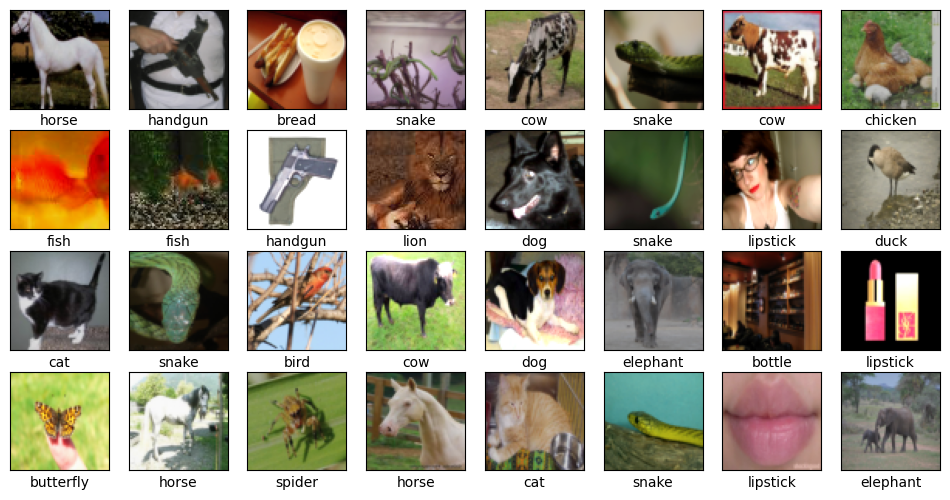

In [25]:
visualize_data(images, labels)

**For questions 3.1 to 3.7, you'll need to write your own model in a way that makes it easy for you to experiment with different architectures and parameters. The goal is to be able to pass the parameters to initialize a new instance of `YourModel` to build different network architectures with different parameters. Below are descriptions of some parameters for `YourModel`:**

1. `Block confirguration`: Our network consists of many blocks. Each block has the pattern `[conv, batch norm, activation, conv, batch norm, activation, max pool, dropout]`. All convolutional layers have filter size $(3, 3)$, strides $(1, 1)$ and padding = 1, and all max pool layers have strides $(2, 2)$, kernel size $2$, and padding = 0. The network will consists of a few blocks before applying a linear layer to output the logits for the softmax layer.

2. `list_feature_maps`: the number of feature maps in the blocks of the network. For example, if `list_feature_maps = [16, 32, 64]`, our network has two blocks with the input_channels or number of feature maps are `16, 32`, and `64` respectively.
3. `drop_rate`: the keep probability for dropout. Setting `drop_rate` to $0.0$ means not using dropout.
4. `batch_norm`: the batch normalization function is used or not. Setting `batch_norm` to `false` means not using batch normalization.
5. `use_skip`: the skip connection is used in the blocks or not. Setting this to `true` means that we use `1x1` Conv2D with `strides=2` for the skip connection.
6. At the end, you need to apply `global average pooling (GAP)` (`AdaptiveAvgPool2d((1, 1))`) to flatten the 3D output tensor before defining the output linear layer for predicting the labels.



Here is the model confirguration of `YourCNN` if the `list_feature_maps = [16, 32, 64]` and `batch_norm = true`.

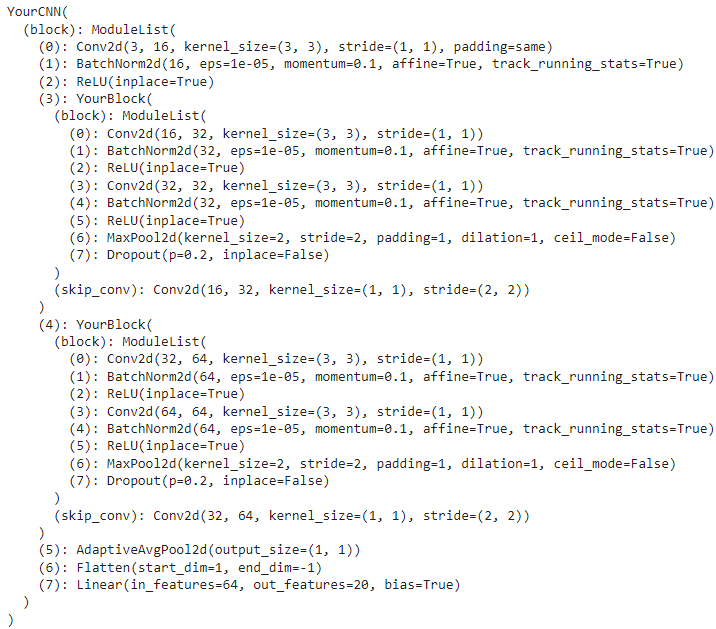

<span style="color:red">**Question 3.1:**</span> **You need to implement the aforementioned CNN**.

**First, you need to implement the block of our CNN in the class `YourBlock`. You can ignore `use_skip` and `skip connection` for simplicity. However, you cannot earn full marks for this question.**

<div style="text-align: right"> <span style="color:red">[6 points]</span> </div>

In [26]:
#Your code here
class YourBlock(nn.Module):
  def __init__(self, in_feature_maps, out_feature_maps, drop_rate = 0.2, batch_norm = True, use_skip = True):
    super(YourBlock, self).__init__()
    self.use_skip = use_skip
    
    layers = []

    # First Conv
    layers.append(nn.Conv2d(in_feature_maps, out_feature_maps, kernel_size=3, stride=1, padding=1))
    if batch_norm:
        layers.append(nn.BatchNorm2d(out_feature_maps))
    layers.append(nn.ReLU(inplace=True))
    
    # Second Conv
    layers.append(nn.Conv2d(out_feature_maps, out_feature_maps, kernel_size=3, stride=1, padding=1))
    if batch_norm:
        layers.append(nn.BatchNorm2d(out_feature_maps))
    layers.append(nn.ReLU(inplace=True))
    
    # Pool + Dropout
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2, padding=0))
    if drop_rate > 0:
        layers.append(nn.Dropout(p=drop_rate))
    
    self.block = nn.Sequential(*layers)

    if use_skip:
        self.skip_conv = nn.Conv2d(in_feature_maps, out_feature_maps, kernel_size=1, stride=2)
    else:
        self.skip_conv = None

  def forward(self, x):
    out = self.block(x)
    if self.use_skip and self.skip_conv is not None:
        skip = self.skip_conv(x)
        out = out + skip
    return out

**Second, you need to use the above `YourBlock` to implement the class `YourCNN`**.

<div style="text-align: right"> <span style="color:red">[6 points]</span> </div>

In [27]:
class YourCNN(nn.Module):
  def __init__(self, list_feature_maps = [16, 32, 64], drop_rate = 0.2, batch_norm= True, use_skip = True):
    super(YourCNN, self).__init__()
    layers = []
    
    layers.append(nn.Conv2d(3, list_feature_maps[0], kernel_size=3, stride=1, padding=1))
    if batch_norm:
        layers.append(nn.BatchNorm2d(list_feature_maps[0]))
    layers.append(nn.ReLU(inplace=True))
    
    # Add blocks
    for i in range(len(list_feature_maps) - 1):
        in_ch = list_feature_maps[i]
        out_ch = list_feature_maps[i+1]
        layers.append(YourBlock(in_ch, out_ch, drop_rate=drop_rate, batch_norm=batch_norm, use_skip=use_skip))
    
    self.features = nn.Sequential(*layers)
    
    # Global Average Pooling + Linear classifier
    num_classes = 20
    self.gap = nn.AdaptiveAvgPool2d((1, 1))
    self.flatten = nn.Flatten(start_dim=1)
    self.fc = nn.Linear(list_feature_maps[-1], num_classes)

  def forward(self, x):
    x = self.features(x)
    x = self.gap(x)       # [B, C, 1, 1]
    x = self.flatten(x)  # [B, C]
    x = self.fc(x)
    return x



**We declare `my_cnn` from `YourCNN` as follows**.

In [28]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
my_cnn = YourCNN(list_feature_maps = [16, 32, 64], use_skip = True)
my_cnn = my_cnn.to(device)
print(my_cnn)

YourCNN(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): YourBlock(
      (block): Sequential(
        (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
        (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (7): Dropout(p=0.2, inplace=False)
      )
      (skip_conv): Conv2d(16, 32, kernel_size=(1, 1), stride=(2, 2))
    )
    (4): YourBlock(
      (block): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1,

**We declare the optimizer and the loss function.**

In [29]:
# Loss and optimizer
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_cnn.parameters(), lr=learning_rate)

**Here are the codes to compute the loss and accuracy.**

In [30]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def compute_loss(model, loss_fn, loader):
  loss = 0
  # Set model to eval mode for inference
  model.eval()
  with torch.no_grad():  # No need to track gradients for validation
    for (batchX, batchY) in loader:
      # Move data to the same device as the model
      batchX, batchY = batchX.to(device).type(torch.float32), batchY.to(device).type(torch.long)
      loss += loss_fn(model(batchX), batchY)
  # Set model back to train mode
  model.train()
  return float(loss)/len(loader)

In [31]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
def compute_acc(model, loader):
    correct = 0
    totals = 0
    # Set model to eval mode for inference
    model.eval()
    for (batchX, batchY) in loader:
        # Move batchX and batchY to the same device as the model
        batchX, batchY = batchX.to(device).type(torch.float32), batchY.to(device)
        outputs = model(batchX)  # feed batch to the model
        totals += batchY.size(0)  # accumulate totals with the current batch size
        predicted = torch.argmax(outputs.data, 1)  # get the predicted class
        # Move batchY to the same device as predicted for comparison
        correct += (predicted == batchY).sum().item()
    return correct / totals

cuda:0


**Here is the code to train our model.**

In [32]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def fit(model= None, train_loader = None, valid_loader= None, optimizer = None,
        num_epochs = 50, verbose = True, seed= 1234):
  torch.manual_seed(seed)
  # Move the model to the device before initializing the optimizer
  model.to(device) # Move the model to the GPU

  if optimizer == None:
    optim = torch.optim.Adam(model.parameters(), lr = 0.001) # Now initialize optimizer with model on GPU
  else:
    optim = optimizer
  history = dict()
  history['val_loss'] = list()
  history['val_acc'] = list()
  history['train_loss'] = list()
  history['train_acc'] = list()

  for epoch in range(num_epochs):
    model.train()
    for (X, y) in train_loader:
      # Move input data to the same device as the model
      X,y = X.to(device), y.to(device)
      # Forward pass
      outputs = model(X.type(torch.float32)) # X is already on the correct device
      loss = loss_fn(outputs, y.type(torch.long))
      # Backward and optimize
      optim.zero_grad()
      loss.backward()
      optim.step()
      #losses and accuracies for epoch
    val_loss = compute_loss(model, loss_fn, valid_loader)
    val_acc = compute_acc(model, valid_loader)
    train_loss = compute_loss(model, loss_fn, train_loader)
    train_acc = compute_acc(model, train_loader)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    if not verbose: #verbose = True means we do show the training information during training
      print(f"Epoch {epoch+1}/{num_epochs}")
      print(f"train loss= {train_loss:.4f} - train acc= {train_acc*100:.2f}% - valid loss= {val_loss:.4f} - valid acc= {val_acc*100:.2f}%")
  return history

In [33]:
history = fit(model= my_cnn, train_loader=train_loader, valid_loader = val_loader, optimizer = optimizer, num_epochs= 10, verbose = False)

Epoch 1/10
train loss= 2.5449 - train acc= 24.64% - valid loss= 2.5227 - valid acc= 23.44%
Epoch 2/10
train loss= 2.1198 - train acc= 32.13% - valid loss= 2.1935 - valid acc= 29.46%
Epoch 3/10
train loss= 1.9229 - train acc= 39.23% - valid loss= 1.9784 - valid acc= 37.80%
Epoch 4/10
train loss= 1.7409 - train acc= 45.10% - valid loss= 1.7906 - valid acc= 44.46%
Epoch 5/10
train loss= 1.9197 - train acc= 42.04% - valid loss= 1.9373 - valid acc= 41.61%
Epoch 6/10
train loss= 1.6335 - train acc= 47.76% - valid loss= 1.6855 - valid acc= 45.30%
Epoch 7/10
train loss= 1.6227 - train acc= 49.06% - valid loss= 1.6584 - valid acc= 48.15%
Epoch 8/10
train loss= 1.4291 - train acc= 55.70% - valid loss= 1.4707 - valid acc= 54.70%
Epoch 9/10
train loss= 1.5534 - train acc= 51.81% - valid loss= 1.6170 - valid acc= 48.36%
Epoch 10/10
train loss= 1.4893 - train acc= 52.51% - valid loss= 1.5983 - valid acc= 49.31%


<span style="color:red">**Question 3.2:**</span> **Now, let us tune the number of blocks, $use\_skip \in \{true,false\}$ and $learning\_rate \in \{0.001, 0.0005\}$. Write your code for this tuning and report the result of the best model on the testing set. Note that you need to show your code for tuning and evaluating on the test set to earn the full marks. During tuning, you can set the instance variable `verbose` of your model to `True` for not showing the training details of each epoch.**

Note that for this question, depending on your computational resource, you can choose `list_feature_maps= [32, 64]` or `list_feature_maps= [16, 32, 64]`.

<div style="text-align: right"> <span style="color:red">[3 points]</span> </div>

In [35]:
list_feature_maps = [32, 64]
use_skip_options = [True, False]
learning_rates = [0.001, 0.0005]

In [36]:
import copy

best_acc = 0.0
best_config = None
best_model = None

print(f"Using device: {device}")

for use_skip in use_skip_options:
    for lr in learning_rates:
        print(f"\nTraining with list_feature_maps={list_feature_maps}, use_skip={use_skip}, lr={lr}")

        # Create model
        model = YourCNN(
            list_feature_maps=list_feature_maps,
            drop_rate=0.2,
            batch_norm=True,
            use_skip=use_skip
        ).to(device)

        optimizer = torch.optim.Adam(model.parameters(), lr=lr)

        # Train
        history = fit(model=model,
                        train_loader=train_loader,
                        valid_loader=val_loader,
                        optimizer=optimizer,
                        num_epochs=10,
                        verbose=False)

        # Evaluate on validation set
        val_acc = compute_acc(model, val_loader)
        print(f"Validation accuracy: {val_acc*100:.2f}%")

        # Save best model
        if val_acc > best_acc:
            best_acc = val_acc
            best_config = (list_feature_maps, use_skip, lr)
            best_model = copy.deepcopy(model)


Using device: cuda:0

Training with list_feature_maps=[32, 64], use_skip=True, lr=0.001
Epoch 1/10
train loss= 2.3565 - train acc= 27.73% - valid loss= 2.3778 - valid acc= 27.24%
Epoch 2/10
train loss= 2.2710 - train acc= 27.63% - valid loss= 2.3171 - valid acc= 24.39%
Epoch 3/10
train loss= 2.1101 - train acc= 34.91% - valid loss= 2.1589 - valid acc= 34.21%
Epoch 4/10
train loss= 2.0088 - train acc= 39.00% - valid loss= 2.0345 - valid acc= 37.17%
Epoch 5/10
train loss= 1.9878 - train acc= 37.90% - valid loss= 1.9900 - valid acc= 35.16%
Epoch 6/10
train loss= 1.8306 - train acc= 42.81% - valid loss= 1.8638 - valid acc= 40.23%
Epoch 7/10
train loss= 1.8168 - train acc= 43.43% - valid loss= 1.8567 - valid acc= 40.97%
Epoch 8/10
train loss= 1.6989 - train acc= 48.01% - valid loss= 1.7259 - valid acc= 44.98%
Epoch 9/10
train loss= 1.6532 - train acc= 48.32% - valid loss= 1.6979 - valid acc= 45.41%
Epoch 10/10
train loss= 1.7518 - train acc= 43.96% - valid loss= 1.7854 - valid acc= 41.50%
V

**Please note that you struggle in implementing the aforementioned CNN. You can use the MiniVGG network in our labs for doing the following questions. However, you cannot earn any mark for 3.1 and 3.2.**

<span style="color:red">**Question 3.3:**</span> **Exploring Data Mixup Technique for Improving Generalization Ability.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

Data mixup is another super-simple technique used to boost the generalization ability of deep learning models. You need to incoroporate data mixup technique to the above deep learning model and experiment its performance. There are some papers and documents for data mixup as follows:
- Main paper for data mixup [link for main paper](https://openreview.net/pdf?id=r1Ddp1-Rb) and a good article [article link](https://www.inference.vc/mixup-data-dependent-data-augmentation/).

You need to extend your model developed above, train a model using data mixup, and write your observations and comments about the result.

In [37]:
def mixup_data(x, y, alpha=1.0, device='cuda'):
    """Returns mixed inputs, pairs of targets, and lambda."""
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1.0

    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(device)

    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

In [40]:
def train_with_mixup(model, train_loader, valid_loader, optimizer, loss_fn, num_epochs=20, alpha=1.0, device='cuda'):
    history = {"train_acc": [], "val_acc": []}

    for epoch in range(num_epochs):
        model.train()
        print(f"Epoch {epoch+1}/{num_epochs}")
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            
            # Apply mixup
            inputs, targets_a, targets_b, lam = mixup_data(xb, yb, alpha, device)
            
            # Forward pass
            outputs = model(inputs)
            loss = mixup_criterion(loss_fn, outputs, targets_a, targets_b, lam)
            
            # Backward + optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        # Validation accuracy
        val_loss = compute_loss(model, loss_fn, valid_loader)
        val_acc = compute_acc(model, valid_loader)
        train_loss = compute_loss(model, loss_fn, train_loader)
        train_acc = compute_acc(model, train_loader)
        
        print(f"train loss= {train_loss:.4f} - train acc= {train_acc*100:.2f}% - valid loss= {val_loss:.4f} - valid acc= {val_acc*100:.2f}%")
        history["val_acc"].append(val_acc)

    return history

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = YourCNN(list_feature_maps = [16, 32, 64], use_skip=True).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

history_mixup = train_with_mixup(model, train_loader, val_loader, optimizer, loss_fn, num_epochs=10, alpha=0.4, device=device)

Epoch 1/10
train loss= 2.3546 - train acc= 28.62% - valid loss= 2.3965 - valid acc= 27.35%
Epoch 2/10
train loss= 2.1406 - train acc= 34.21% - valid loss= 2.1582 - valid acc= 32.84%
Epoch 3/10
train loss= 1.9828 - train acc= 38.26% - valid loss= 2.0406 - valid acc= 35.37%
Epoch 4/10
train loss= 1.8468 - train acc= 42.06% - valid loss= 1.8883 - valid acc= 41.29%
Epoch 5/10
train loss= 1.8780 - train acc= 41.89% - valid loss= 1.8803 - valid acc= 42.77%
Epoch 6/10
train loss= 1.7533 - train acc= 45.72% - valid loss= 1.7961 - valid acc= 44.56%
Epoch 7/10
train loss= 1.8073 - train acc= 44.11% - valid loss= 1.8518 - valid acc= 42.77%
Epoch 8/10
train loss= 1.6924 - train acc= 48.62% - valid loss= 1.7223 - valid acc= 47.31%
Epoch 9/10
train loss= 1.6011 - train acc= 51.31% - valid loss= 1.6302 - valid acc= 50.05%
Epoch 10/10
train loss= 1.4817 - train acc= 54.26% - valid loss= 1.5370 - valid acc= 52.27%


TypeError: compute_acc() takes 2 positional arguments but 3 were given

In [44]:
test_acc = compute_acc(model, val_loader)
print(f"Test Accuracy with Mixup: {test_acc*100:.2f}%")

Test Accuracy with Mixup: 52.38%


<span style="color:red">**Question 3.4:**</span> **Exploring CutMix Technique for Improving Generalization Ability.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

CutMix is another super-simple technique used to boost the generalization ability of deep learning models. You need to incoroporate data CutMix technique to the above deep learning model and experiment its performance. There are some papers and documents for data mixup as follows:
- Main paper for Cutmix [link for main paper](https://arxiv.org/pdf/1905.04899v2) and a good article [article link](https://shorturl.at/TNwjv).

You need to extend your model developed above, train a model using data CutMix, and write your observations and comments about the result.

In [50]:
def rand_bbox(size, lam):
    """Generate random bounding box."""
    W = size[2]
    H = size[3]
    cut_rat = np.sqrt(1. - lam)
    cut_w = int(W * cut_rat)
    cut_h = int(H * cut_rat)

    # uniform center position
    cx = np.random.randint(W)
    cy = np.random.randint(H)

    bbx1 = np.clip(cx - cut_w // 2, 0, W)
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cy + cut_h // 2, 0, H)

    return bbx1, bby1, bbx2, bby2

def cutmix_data(x, y, alpha=1.0, device='cuda'):
    """Apply CutMix augmentation."""
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1.0

    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(device)

    y_a, y_b = y, y[index]

    bbx1, bby1, bbx2, bby2 = rand_bbox(x.size(), lam)
    x[:, :, bbx1:bbx2, bby1:bby2] = x[index, :, bbx1:bbx2, bby1:bby2]

    lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (x.size()[-1] * x.size()[-2]))

    return x, y_a, y_b, lam

def cutmix_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)



In [54]:
def train_with_cutmix(model, train_loader, valid_loader, optimizer, loss_fn, num_epochs=20, alpha=1.0, device='cuda'):
    history = {"val_acc": []}

    for epoch in range(num_epochs):
        model.train()
        print(f"Epoch {epoch+1}/{num_epochs}")
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)

            # Apply CutMix
            inputs, targets_a, targets_b, lam = cutmix_data(xb, yb, alpha, device)

            # Forward
            outputs = model(inputs)
            loss = cutmix_criterion(loss_fn, outputs, targets_a, targets_b, lam)

            # Backward + optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Validation accuracy
        val_loss = compute_loss(model, loss_fn, valid_loader)
        val_acc = compute_acc(model, valid_loader)
        train_loss = compute_loss(model, loss_fn, train_loader)
        train_acc = compute_acc(model, train_loader)
        print(f"train loss= {train_loss:.4f} - train acc= {train_acc*100:.2f}% - valid loss= {val_loss:.4f} - valid acc= {val_acc*100:.2f}%")
        history["val_acc"].append(val_acc)

    return history


In [55]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = YourCNN(list_feature_maps = [16, 32, 64], use_skip=True).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

history_cutmix = train_with_cutmix(model, train_loader, val_loader, optimizer, loss_fn, num_epochs=10, alpha=1.0, device=device)

Epoch 1/10
train loss= 2.3871 - train acc= 24.71% - valid loss= 2.3844 - valid acc= 24.82%
Epoch 2/10
train loss= 2.2021 - train acc= 32.77% - valid loss= 2.2322 - valid acc= 32.10%
Epoch 3/10
train loss= 2.1072 - train acc= 34.18% - valid loss= 2.1517 - valid acc= 30.83%
Epoch 4/10
train loss= 1.9400 - train acc= 40.17% - valid loss= 1.9742 - valid acc= 39.60%
Epoch 5/10
train loss= 1.7745 - train acc= 45.26% - valid loss= 1.8073 - valid acc= 43.08%
Epoch 6/10
train loss= 1.8313 - train acc= 42.53% - valid loss= 1.8788 - valid acc= 41.61%
Epoch 7/10
train loss= 1.7059 - train acc= 47.94% - valid loss= 1.7254 - valid acc= 46.25%
Epoch 8/10
train loss= 1.6015 - train acc= 50.42% - valid loss= 1.6313 - valid acc= 48.68%
Epoch 9/10
train loss= 1.5409 - train acc= 52.14% - valid loss= 1.5854 - valid acc= 50.37%
Epoch 10/10
train loss= 1.6260 - train acc= 49.90% - valid loss= 1.6592 - valid acc= 47.20%


In [56]:
test_acc = compute_acc(model, val_loader)
print(f"Test Accuracy with CutMix: {test_acc*100:.2f}%")

Test Accuracy with CutMix: 48.36%


<span style="color:red">**Question 3.5:**</span> Implement the **one-versus-all (OVA)** loss. The details are as follows:
- You need to apply `the sigmoid activation function` to logits $h = [h_1, h_2,...,h_M]$ instead of `the softmax activation` function as usual to obtain $p = [p_1, p_2,...,p_M]$, meaning that $p_i = sigmoid(h_i), i=1,...,M$. Note that $M$ is the number of classes.
- Given a data example $x$ with the ground-truth label $y$, the idea is to maximize the likelihood $p_y$ and to minimize the likelihoods $p_i, i \neq y$. Therefore, the objective function is to find the model parameters to
  - $\max\left\{ \log p_{y}+\sum_{i\neq y}\log(1-p_{i})\right\}$ or equivalently $\min\left\{ -\log p_{y}-\sum_{i\neq y}\log(1-p_{i})\right\}$.
  - For example, if $M=3$ and $y=2$, you need to minimize $\min\left\{ -\log(1-p_{1})-\log p_{2}-\log(1-p_{3})\right\}$.

Compare the model trained with the OVA loss and the same model trained with the standard cross-entropy loss.

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>



In [74]:
class OVALoss(nn.Module):
    def __init__(self):
        super(OVALoss, self).__init__()
    
    def forward(self, logits, targets):
        """
        logits: [B, M] raw scores
        targets: [B] class indices
        """
        probs = torch.sigmoid(logits)  # apply sigmoid independently

        # make one-hot labels
        num_classes = logits.size(1)
        targets_onehot = torch.nn.functional.one_hot(targets, num_classes=num_classes).float()

        # OVA loss = - sum( y*log(p) + (1-y)*log(1-p) )
        # This is basically BCE for each class
        loss = - (targets_onehot * torch.log(probs + 1e-12) +
                  (1 - targets_onehot) * torch.log(1 - probs + 1e-12))

        return loss.mean()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def fit_with_loss_fn(
        model=None, 
        train_loader=None, 
        valid_loader=None, 
        optimizer=None,
        loss_fn=None,
        num_epochs=50, 
        seed=1234
        ):
    
    torch.manual_seed(seed)
    model.to(device)  # move model to GPU/CPU

    # default optimizer if not provided
    if optimizer is None:
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    # default loss function if not provided
    if loss_fn is None:
        loss_fn = nn.CrossEntropyLoss()

    history = {"val_loss": [], "val_acc": [], "train_loss": [], "train_acc": []}

    for epoch in range(num_epochs):
        model.train()
        print(f"Epoch {epoch+1}/{num_epochs} ")
        for (X, y) in train_loader:
            X, y = X.to(device), y.to(device)
            # Forward pass
            outputs = model(X.type(torch.float32))
            loss = loss_fn(outputs, y)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # End of epoch: compute metrics
        val_loss = compute_loss(model, loss_fn, valid_loader)
        val_acc = compute_acc(model, valid_loader)
        train_loss = compute_loss(model, loss_fn, train_loader)
        train_acc = compute_acc(model, train_loader)

        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        
        print(f"train loss= {train_loss:.4f} - train acc= {train_acc*100:.2f}% - valid loss= {val_loss:.4f} - valid acc= {val_acc*100:.2f}%")

    return history

In [71]:
model_ce = YourCNN(list_feature_maps = [16, 32, 64], use_skip=True).to(device)
history_ce = fit_with_loss_fn(model_ce, train_loader, val_loader, num_epochs=10)

Epoch 1/10 
train loss= 2.3142 - train acc= 27.47% - valid loss= 2.3261 - valid acc= 27.03%
Epoch 2/10 
train loss= 2.0142 - train acc= 36.62% - valid loss= 2.0635 - valid acc= 34.00%
Epoch 3/10 
train loss= 1.8803 - train acc= 40.43% - valid loss= 1.9243 - valid acc= 41.82%
Epoch 4/10 
train loss= 1.7786 - train acc= 45.87% - valid loss= 1.8216 - valid acc= 45.62%
Epoch 5/10 
train loss= 1.7118 - train acc= 46.06% - valid loss= 1.7270 - valid acc= 43.40%
Epoch 6/10 
train loss= 1.7077 - train acc= 46.05% - valid loss= 1.7757 - valid acc= 43.08%
Epoch 7/10 
train loss= 1.5514 - train acc= 50.97% - valid loss= 1.6102 - valid acc= 49.52%
Epoch 8/10 
train loss= 1.4082 - train acc= 55.48% - valid loss= 1.4117 - valid acc= 54.80%
Epoch 9/10 
train loss= 1.4296 - train acc= 53.63% - valid loss= 1.4880 - valid acc= 53.01%
Epoch 10/10 
train loss= 1.4386 - train acc= 54.01% - valid loss= 1.5212 - valid acc= 49.74%


In [75]:
model_ova = YourCNN(list_feature_maps = [16, 32, 64], use_skip=True).to(device)
criterion_ova = OVALoss()
optimizer = torch.optim.Adam(model_ova.parameters(), lr=0.001)

history_ova = fit_with_loss_fn(model_ova, train_loader, val_loader, optimizer=optimizer, loss_fn=criterion_ova, num_epochs=10)

Epoch 1/10 
train loss= 0.1617 - train acc= 30.74% - valid loss= 0.1631 - valid acc= 28.83%
Epoch 2/10 
train loss= 0.1531 - train acc= 32.94% - valid loss= 0.1553 - valid acc= 30.20%
Epoch 3/10 
train loss= 0.1430 - train acc= 39.05% - valid loss= 0.1461 - valid acc= 37.70%
Epoch 4/10 
train loss= 0.1364 - train acc= 43.81% - valid loss= 0.1395 - valid acc= 42.13%
Epoch 5/10 
train loss= 0.1303 - train acc= 45.65% - valid loss= 0.1348 - valid acc= 42.45%
Epoch 6/10 
train loss= 0.1324 - train acc= 46.39% - valid loss= 0.1366 - valid acc= 42.66%
Epoch 7/10 
train loss= 0.1384 - train acc= 44.93% - valid loss= 0.1420 - valid acc= 41.92%
Epoch 8/10 
train loss= 0.1184 - train acc= 53.67% - valid loss= 0.1215 - valid acc= 51.00%
Epoch 9/10 
train loss= 0.1136 - train acc= 55.91% - valid loss= 0.1184 - valid acc= 52.38%
Epoch 10/10 
train loss= 0.1224 - train acc= 50.90% - valid loss= 0.1283 - valid acc= 47.20%


<span style="color:red">**Question 3.6:**</span> **Attack your best obtained model with PGD attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set. Write the code for the attacks and report the robust accuracies. Also choose a random set of 20 clean images in the testing set and visualize the original and attacked images.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [ ]:
def pgd_attack(model, images, labels, eps=0.0313, alpha=0.002, iters=20, device="cuda"):
    images = images.clone().detach().to(device)
    labels = labels.clone().detach().to(device)
    ori_images = images.data

    for i in range(iters):
        images.requires_grad = True
        outputs = model(images)

        model.zero_grad()
        loss = nn.CrossEntropyLoss()(outputs, labels)
        loss.backward()

        # Gradient ascent step
        adv_images = images + alpha * images.grad.sign()

        # Project back into epsilon-ball & valid image range [0,1]
        eta = torch.clamp(adv_images - ori_images, min=-eps, max=eps)
        images = torch.clamp(ori_images + eta, min=0, max=1).detach()

    return images

def evaluate_pgd(model, test_loader, eps=0.0313, alpha=0.002, iters=20, device="cuda"):
    model.eval()
    correct, total = 0, 0

    for xb, yb in test_loader:
        xb, yb = xb.to(device), yb.to(device)

        # Generate adversarial examples
        adv_xb = pgd_attack(model, xb, yb, eps=eps, alpha=alpha, iters=iters, device=device)

        # Test on adversarial images
        outputs = model(adv_xb)
        preds = outputs.argmax(dim=1)
        correct += (preds == yb).sum().item()
        total += yb.size(0)

    robust_acc = correct / total
    print(f"Robust Accuracy under PGD Attack: {robust_acc*100:.2f}%")
    return robust_acc

def unnormalize(img):
    return img * 0.5 + 0.5

def visualize_pgd_examples(model, test_loader, eps=0.0313, alpha=0.002, iters=20, device="cuda"):
    model.eval()
    xb, yb = next(iter(test_loader))
    xb, yb = xb[:20].to(device), yb[:20].to(device)   # take 20 images
    
    adv_xb = pgd_attack(model, xb, yb, eps=eps, alpha=alpha, iters=iters, device=device)

    # Move to CPU for plotting
    xb, adv_xb, yb = xb.cpu(), adv_xb.cpu(), yb.cpu()

    fig, axes = plt.subplots(3, 20, figsize=(20, 3))
    for i in range(20):
        # Clean image
        axes[0, i].imshow(unnormalize(xb[i]).permute(1, 2, 0).clamp(0,1))
        axes[0, i].axis("off")

        # Adversarial image
        axes[1, i].imshow(unnormalize(adv_xb[i]).permute(1, 2, 0).clamp(0,1))
        axes[1, i].axis("off")

        # Noise
        delta = adv_xb[i] - xb[i]
        axes[2, i].imshow((delta.permute(1, 2, 0).numpy() * 10 + 0.5).clip(0,1))
        axes[2, i].axis("off")

    axes[0, 0].set_ylabel("Clean", fontsize=10)
    axes[1, 0].set_ylabel("PGD", fontsize=10)
    axes[2, 0].set_ylabel("Delta", fontsize=10)
    plt.show()


Robust Accuracy under PGD Attack: 1.48%


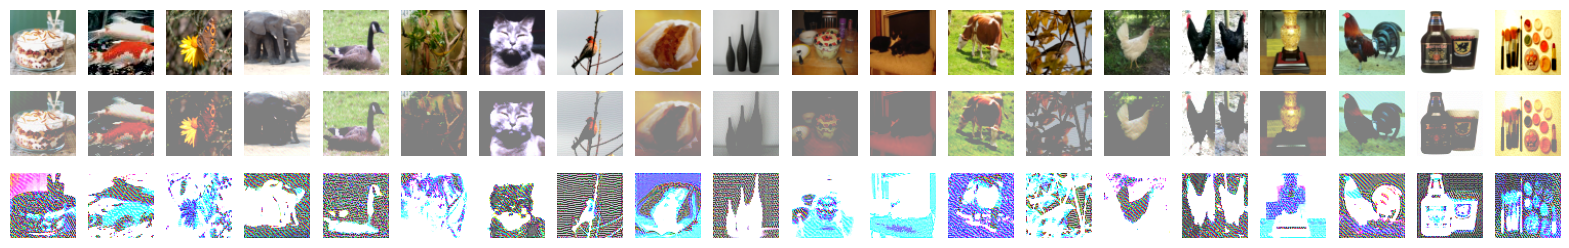

In [85]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_model = model_ce
best_model.eval()
robust_acc = evaluate_pgd(best_model, val_loader, eps=0.0313, alpha=0.002, iters=20, device=device)

# Visualize 20 examples
visualize_pgd_examples(best_model, val_loader, eps=0.0313, alpha=0.002, iters=20, device=device)


<span style="color:red">**Question 3.7:**</span> **Train a robust model using adversarial training with PGD ${\epsilon= 0.0313, k=10, \eta= 0.002}$. Write the code for the adversarial training and report the robust accuracies. After finishing the training, you need to store your best robust model in the folder `./models` and load the model to evaluate the robust accuracies for PGD and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set.**

**This task might take a long training time. Therefore, you can start from a pretrained model from the previous questions. Subsequently, you can apply adversarial training to train the robust model in a few epochs (e.g., 5 epochs). You can decide the *number of epochs* depending on your own situations. Our marking mainly bases on the correctness of your implementation.**  
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [92]:
def pgd_adversarial_training(
    model, train_loader, valid_loader, 
    optimizer, loss_fn, 
    eps=0.0313, alpha=0.002, iters=10, 
    num_epochs=5, device="cuda"
):
    model.to(device)
    history = {"train_acc": [], "val_acc": []}

    for epoch in range(num_epochs):
        model.train()
        print(f"Epoch {epoch+1}/{num_epochs} ")
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)

            # Generate PGD adversarial examples
            adv_xb = pgd_attack(model, xb, yb, eps=eps, alpha=alpha, iters=iters, device=device)

            # Forward pass on adversarial data
            outputs = model(adv_xb)
            loss = loss_fn(outputs, yb)

            # Backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        train_acc = compute_acc(model, train_loader)
        val_acc = compute_acc(model, valid_loader)
        history["train_acc"].append(train_acc)
        history["val_acc"].append(val_acc)

        print(f"| Train Acc: {train_acc*100:.2f}% "
              f"| Val Acc: {val_acc*100:.2f}%")

    return model, history

In [93]:
robust_model = YourCNN(list_feature_maps=[16, 32, 64], use_skip=True).to(device)
optimizer = torch.optim.Adam(robust_model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

robust_model, history = pgd_adversarial_training(
    robust_model, train_loader, val_loader,
    optimizer, loss_fn,
    eps=0.0313, alpha=0.002, iters=10,
    num_epochs=5, device=device
)


Epoch 1/5 
| Train Acc: 8.59% | Val Acc: 8.34%
Epoch 2/5 
| Train Acc: 8.89% | Val Acc: 8.45%
Epoch 3/5 
| Train Acc: 7.41% | Val Acc: 7.07%
Epoch 4/5 
| Train Acc: 7.05% | Val Acc: 6.34%
Epoch 5/5 
| Train Acc: 7.78% | Val Acc: 8.03%


In [94]:
os.makedirs("./models", exist_ok=True)
torch.save(robust_model.state_dict(), "./models/robust_model.pth")

In [95]:
robust_model_loaded = YourCNN(list_feature_maps=[16, 32, 64], use_skip=True).to(device)
robust_model_loaded.load_state_dict(torch.load("./models/robust_model.pth"))
robust_model_loaded.eval()

C:\Users\errty\AppData\Local\Temp\ipykernel_13504\2926653281.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  robust_model_loaded.load_state_dict(torch.load("./models/rob

YourCNN(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): YourBlock(
      (block): Sequential(
        (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
        (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (7): Dropout(p=0.2, inplace=False)
      )
      (skip_conv): Conv2d(16, 32, kernel_size=(1, 1), stride=(2, 2))
    )
    (4): YourBlock(
      (block): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1,

In [97]:
# Evaluate with PGD-20 (stronger attack than training)
pgd_acc = evaluate_pgd(robust_model_loaded, val_loader, eps=0.0313, alpha=0.002, iters=20, device=device)

# Define FGSM (single-step attack)
def fgsm_attack(model, images, labels, eps=0.0313, device="cuda"):
    images = images.clone().detach().to(device)
    labels = labels.clone().detach().to(device)
    images.requires_grad = True
    outputs = model(images)
    loss = nn.CrossEntropyLoss()(outputs, labels)
    model.zero_grad()
    loss.backward()
    adv_images = images + eps * images.grad.sign()
    adv_images = torch.clamp(adv_images, 0, 1).detach()
    return adv_images

def evaluate_fgsm(model, test_loader, eps=0.0313, device="cuda"):
    model.eval()
    correct, total = 0, 0
    for xb, yb in test_loader:
        xb, yb = xb.to(device), yb.to(device)
        adv_xb = fgsm_attack(model, xb, yb, eps, device)
        outputs = model(adv_xb)
        preds = outputs.argmax(dim=1)
        correct += (preds == yb).sum().item()
        total += yb.size(0)
    robust_acc = correct / total
    print(f"Robust Accuracy under FGSM: {robust_acc*100:.2f}%")
    return robust_acc

Robust Accuracy under PGD Attack: 9.93%


In [99]:
# FGSM evaluation
fgsm_acc = evaluate_fgsm(robust_model_loaded, val_loader, eps=0.0313, device=device)

Robust Accuracy under FGSM: 13.41%


<span style="color:red">**Question 3.8 (Kaggle competition)**</span>
<div style="text-align: right"> <span style="color:red">[10 points]</span> </div10

You can reuse the best model obtained in this assignment or develop new models to evaluate on the **testing set of the assignment Kaggle competion**. However, to gain any points for this question, your testing accuracy must **exceed** the accuracy threshold from a base model developed by us as shown in the leader board of the competition.

The marks for this question are as follows:
- If you are in *top 10%* of your cohort, you gain *10 points*.
- If you are in *top 20%* of your cohort, you gain *8 points*.
- If you *beat* the second boss model, you gain *6 points*.
- If you *beat* the first boss model, you gain *4 points*.

Moreover, if you rank in the top 10 of the entire cohort, you will receive a prestigious certificate signed by a renowned professor from our Faculty of Information Technology — a valuable highlight for your CV.
And for the overall winner, we have a special prize: *a book of your choice from Amazon, worth up to 150 AUDs*.

---
**<div style="text-align: center"> <span style="color:black">END OF ASSIGNMENT</span> </div>**
**<div style="text-align: center"> <span style="color:black">GOOD LUCK WITH YOUR ASSIGNMENT 1!</span> </div>**